# 사전과제 3
- 보스턴 지역의 지역별 집값에 영향을 미치는 요인을 정리한 데이터를 기반으로, 각 속성이 집 값에 미치는 영향을 분석해보려고 합니다. 아래 링크의 데이터 셋을 이용해서 보스턴의 집값에 영향을 미치는 Feature 들을 조합해서 각 지역의 집값(​MEDV)​을 예측하는 모델을 만들고, 해당 내용을 리포트로 작성해주세요.
- 데이터 탐색 과정, Feature 선정 과정, 예측 모형 학습과정 및 Evaluation 결과, 고려사항 등을 리포트에 포함시켜 주세요.

In [52]:
#데이터 불러오기
import numpy as np
import pandas as pd

file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)

#데이터 확인
boston #506개의 행, 14개의 열 중 결과값은 MEDV(집값)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [53]:
#데이터 확인2 - 혹시 null값이 있는 데이터는 없는가? 없음
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [54]:
#데이터 분포 확인
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1. 전체 13개 Feature을 대상으로 모델을 만들고 학습

In [55]:
#데이터 쉐이프 확인
print(np.shape(boston))

(506, 14)


In [56]:
#이 506행의 전 Feature를 대상으로 80%를 학습, 20%로 평가해보자
from sklearn.model_selection import train_test_split

x = boston.iloc[:,0:13]
y = boston['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [57]:
#모델 만들기
#데이터의 사이즈가 작고 (총 506)개 이므로 단순하므로 은닉층의 수를 줄여 overfit을 피한다. 
#활성화 함수로는 ReLu(Rectified Linear Unit)사용
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,))) #13개의 input에서 64개의 output을 갖는 입력층
model.add(layers.Dense(32, activation='relu')) #64개의 input에서 32개의 output을 갖는 은닉층
model.add(layers.Dense(1)) #1개의 결과를 내는 출력층

In [58]:
#모델 컴파일링 
#최적화 함수로는 학습률 0.001의 Adam 사용
#손실 함수로는 MSE 함수, 평가 지표로는 MAE를 사용

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

- 손실함수 MSE : Mean Square Error, 평균제곱오차 
- 평가지표 MAR : Mean Absolute Error, 평균절대오차

In [59]:
#데이터를 학습시키기 이해 모두 array로 변환
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [60]:
#학습

from keras.callbacks import EarlyStopping 
#지정한 epoch만큼 반복하는 동안 학습 오차에 개선이 없다면 자동으로 학습을 종료

early_stop = EarlyStopping(monitor='val_loss', patience=20) #val_loss를 모니터링하여 20번의 epoch동안 개선이 없다면 종료
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 13ms/step - loss: 286.3315 - mae: 11.7601 - val_loss: 136.5855 - val_mae: 9.9830
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 93.3462 - mae: 7.2137 - val_loss: 68.7246 - val_mae: 5.4523
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 71.5326 - mae: 6.3906 - val_loss: 82.2842 - val_mae: 5.7215
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 69.0072 - mae: 5.9827 - val_loss: 69.4958 - val_mae: 6.0949
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 61.7228 - mae: 5.5175 - val_loss: 64.7350 - val_mae: 5.5017
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 62.5114 - mae: 5.6248 - val_loss: 62.8476 - val_mae: 5.8432
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 59.9781 - mae: 5.4395 - val_loss: 62.8929 - val_mae: 5.2410
Epoch 8/500
13/13 [==============================] - 0s 4ms/step 

13/13 [==============================] - 0s 6ms/step - loss: 27.0721 - mae: 3.7332 - val_loss: 32.9283 - val_mae: 4.0249
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 28.2834 - mae: 3.8430 - val_loss: 32.2032 - val_mae: 4.0504
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 29.7528 - mae: 3.9972 - val_loss: 34.9286 - val_mae: 3.7786
Epoch 65/500
13/13 [==============================] - 0s 4ms/step - loss: 30.3604 - mae: 4.1602 - val_loss: 33.9057 - val_mae: 4.4911
Epoch 66/500
13/13 [==============================] - 0s 3ms/step - loss: 31.6852 - mae: 3.9933 - val_loss: 32.7806 - val_mae: 3.8006
Epoch 67/500
13/13 [==============================] - 0s 3ms/step - loss: 27.0588 - mae: 3.7550 - val_loss: 32.8108 - val_mae: 3.8585
Epoch 68/500
13/13 [==============================] - 0s 3ms/step - loss: 26.3613 - mae: 3.6750 - val_loss: 31.2811 - val_mae: 4.2861
Epoch 69/500
13/13 [==============================] - 0s 3ms/step - loss: 2

Epoch 123/500
13/13 [==============================] - 0s 4ms/step - loss: 25.3689 - mae: 3.6486 - val_loss: 27.4248 - val_mae: 3.8962
Epoch 124/500
13/13 [==============================] - 0s 3ms/step - loss: 23.6165 - mae: 3.5536 - val_loss: 27.3734 - val_mae: 3.4448
Epoch 125/500
13/13 [==============================] - 0s 3ms/step - loss: 21.9379 - mae: 3.4043 - val_loss: 26.7390 - val_mae: 3.5297
Epoch 126/500
13/13 [==============================] - 0s 4ms/step - loss: 21.8870 - mae: 3.4213 - val_loss: 30.6733 - val_mae: 3.5212
Epoch 127/500
13/13 [==============================] - 0s 5ms/step - loss: 22.6843 - mae: 3.4587 - val_loss: 25.5753 - val_mae: 3.5958
Epoch 128/500
13/13 [==============================] - 0s 5ms/step - loss: 21.3535 - mae: 3.3355 - val_loss: 25.9399 - val_mae: 3.6375
Epoch 129/500
13/13 [==============================] - 0s 5ms/step - loss: 21.5031 - mae: 3.3251 - val_loss: 28.1821 - val_mae: 3.5794
Epoch 130/500
13/13 [==============================] - 

13/13 [==============================] - 0s 5ms/step - loss: 18.7437 - mae: 3.2002 - val_loss: 25.6326 - val_mae: 3.2543
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 18.2827 - mae: 3.1383 - val_loss: 22.6199 - val_mae: 3.3179
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 17.1811 - mae: 2.9567 - val_loss: 22.7939 - val_mae: 3.3454
Epoch 186/500
13/13 [==============================] - 0s 4ms/step - loss: 19.2557 - mae: 3.1101 - val_loss: 24.9869 - val_mae: 3.8974
Epoch 187/500
13/13 [==============================] - 0s 4ms/step - loss: 18.9852 - mae: 3.2049 - val_loss: 23.9160 - val_mae: 3.8198
Epoch 188/500
13/13 [==============================] - 0s 4ms/step - loss: 19.5104 - mae: 3.2958 - val_loss: 22.0126 - val_mae: 3.3331
Epoch 189/500
13/13 [==============================] - 0s 7ms/step - loss: 20.3413 - mae: 3.4242 - val_loss: 39.1414 - val_mae: 4.3149
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - 

[26.70773696899414, 3.3291149139404297]

In [61]:
#결과 확인
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 8ms/step - loss: 26.7077 - mae: 3.3291


[26.70773696899414, 3.3291149139404297]

### 500번의 학습으로 테스트 결과가 실제값 보다 약 $3,329정도의 오차를 갖는 모델 생성

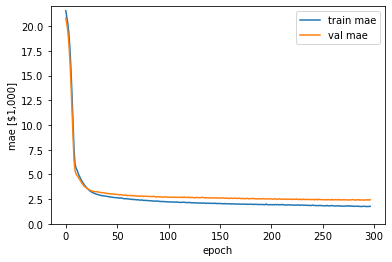

In [90]:
#학습과정 그래프
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

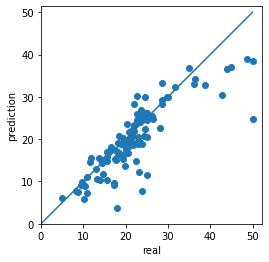

In [63]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

### 2. 각각 Feature들 값의 범위가 다르므로 데이터 표준화를 해본다.

In [64]:
#데이터 표준화 
#서로 다른 범위를 갖고 있다면, 직접적인 비교가 어렵기 때문에 이를 동일한 범위를 갖도록 해주는 작업
#평균 0, 표준편차 1로 정규화

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std #학습데이터를 가지고 계산한 평균과 표준편차를 사용하여 평가 데이터 표준화에도 사용

In [65]:
#모델링 (위와 같음)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [66]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 13ms/step - loss: 564.8284 - mae: 21.9483 - val_loss: 508.4276 - val_mae: 20.8196
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 518.6960 - mae: 20.9145 - val_loss: 463.2809 - val_mae: 19.7206
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 461.6737 - mae: 19.5631 - val_loss: 407.1187 - val_mae: 18.2599
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 390.7760 - mae: 17.7773 - val_loss: 337.2713 - val_mae: 16.2796
Epoch 5/500
13/13 [==============================] - 1s 49ms/step - loss: 306.9859 - mae: 15.3797 - val_loss: 255.6221 - val_mae: 13.6973
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 215.0929 - mae: 12.3981 - val_loss: 175.6437 - val_mae: 10.8586
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 136.6139 - mae: 9.4059 - val_loss: 115.4099 - val_mae: 8.4098
Epoch 8/500
13/13 [======================

13/13 [==============================] - 0s 4ms/step - loss: 9.3143 - mae: 2.1352 - val_loss: 17.1062 - val_mae: 3.0291
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 9.3321 - mae: 2.1339 - val_loss: 16.7566 - val_mae: 3.0297
Epoch 64/500
13/13 [==============================] - 0s 4ms/step - loss: 9.2667 - mae: 2.1278 - val_loss: 17.0743 - val_mae: 3.0338
Epoch 65/500
13/13 [==============================] - 0s 4ms/step - loss: 9.0510 - mae: 2.1058 - val_loss: 16.6214 - val_mae: 3.0220
Epoch 66/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1037 - mae: 2.1144 - val_loss: 16.4345 - val_mae: 3.0059
Epoch 67/500
13/13 [==============================] - 0s 4ms/step - loss: 9.0852 - mae: 2.1043 - val_loss: 17.0335 - val_mae: 3.0240
Epoch 68/500
13/13 [==============================] - 0s 4ms/step - loss: 8.8818 - mae: 2.0873 - val_loss: 16.5664 - val_mae: 3.0207
Epoch 69/500
13/13 [==============================] - 0s 3ms/step - loss: 8.8525 -

13/13 [==============================] - 0s 3ms/step - loss: 6.6695 - mae: 1.8347 - val_loss: 14.7462 - val_mae: 2.7855
Epoch 124/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5891 - mae: 1.8181 - val_loss: 14.6677 - val_mae: 2.7939
Epoch 125/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5961 - mae: 1.8156 - val_loss: 14.7713 - val_mae: 2.7815
Epoch 126/500
13/13 [==============================] - 0s 4ms/step - loss: 6.5216 - mae: 1.8122 - val_loss: 14.6466 - val_mae: 2.7954
Epoch 127/500
13/13 [==============================] - 0s 4ms/step - loss: 6.5554 - mae: 1.8242 - val_loss: 14.5837 - val_mae: 2.7813
Epoch 128/500
13/13 [==============================] - 0s 4ms/step - loss: 6.5031 - mae: 1.8088 - val_loss: 14.7039 - val_mae: 2.7801
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 6.4164 - mae: 1.7986 - val_loss: 14.6038 - val_mae: 2.7793
Epoch 130/500
13/13 [==============================] - 0s 4ms/step - loss: 6

In [67]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 14.4179 - mae: 2.7279


[14.41794490814209, 2.7278552055358887]

### 같은 방법으로 학습 후, 테스트 결과가 실제값 보다 약 $2,728정도의 오차를 갖는 더 좋은 성능의 모델 생성    

### 표준화된 모델의 성능이 더 좋은것을 확인

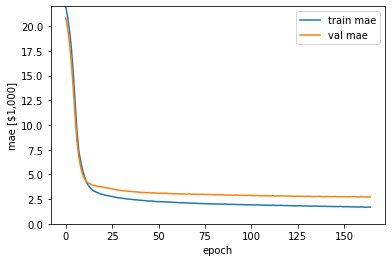

In [68]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

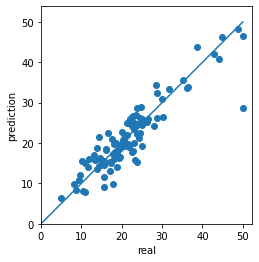

In [69]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

## 전체 Feature를 그냥 사용하는 모델보다 더 성능이 좋은 모델을 만들 수 없을까?    

###  3. 전체 Feature를 사용하되, Outlier를 제거해 보자.

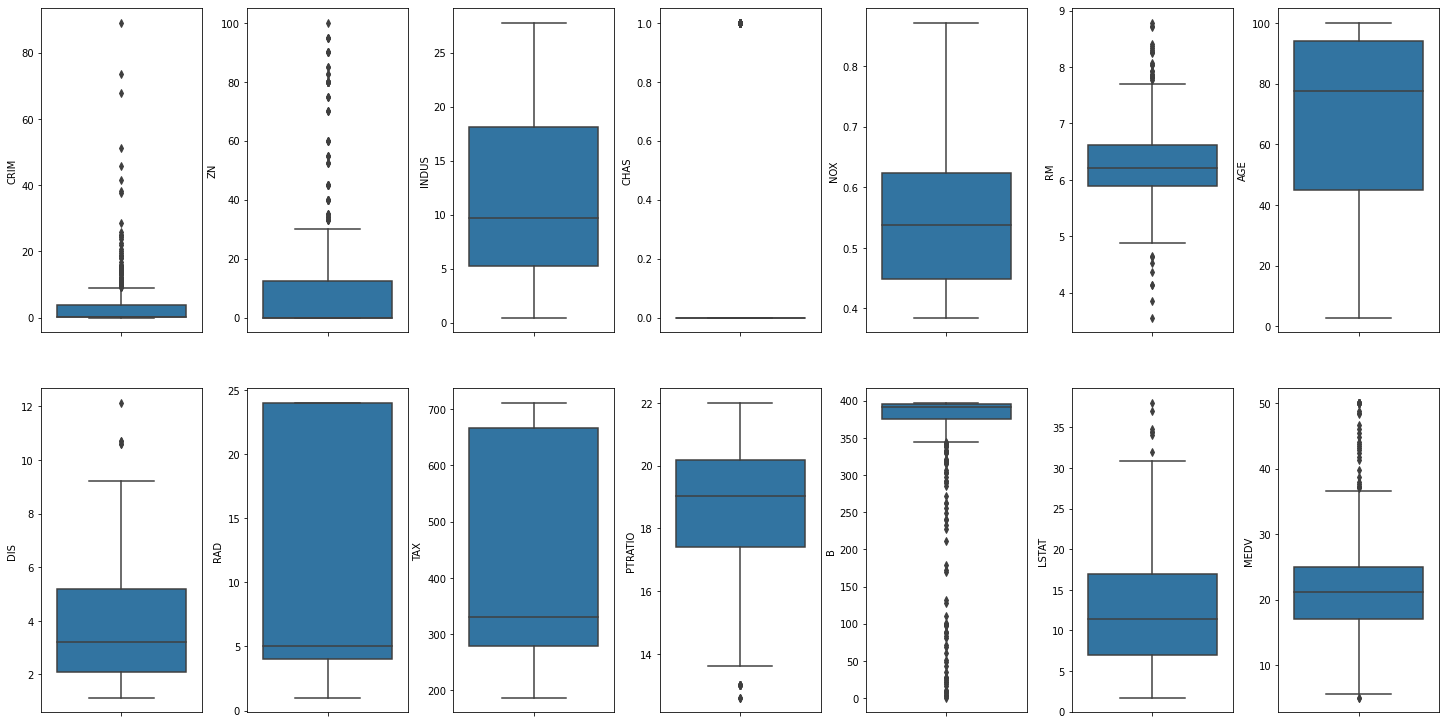

In [70]:
#아웃라이어들 보기
import scipy as sc
import seaborn as sb

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sb.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [71]:
#아웃라이어가 각 feature마다 얼마나 되는지 확인
for k, v in boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    percent = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
    print("Feature %s outliers = %.2f%%" % (k, percent))

Feature CRIM outliers = 13.04%
Feature ZN outliers = 13.44%
Feature INDUS outliers = 0.00%
Feature CHAS outliers = 100.00%
Feature NOX outliers = 0.00%
Feature RM outliers = 5.93%
Feature AGE outliers = 0.00%
Feature DIS outliers = 0.99%
Feature RAD outliers = 0.00%
Feature TAX outliers = 0.00%
Feature PTRATIO outliers = 2.96%
Feature B outliers = 15.22%
Feature LSTAT outliers = 1.38%
Feature MEDV outliers = 7.91%


집값(MEDV)의 아웃라이어 비율이 7.91%   
이를 제거하고 학습을 진행한다.

In [72]:
#집값 아웃라이어 제거
boston_ex_outlier = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston_ex_outlier))

(490, 14)


In [73]:
x = boston_ex_outlier.iloc[:,0:13]
y = boston_ex_outlier['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [74]:
#데이터 표준화 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std

In [75]:
#모델링
#데이터의 사이즈가 작고 (총 490)개 이므로 단순하므로 은닉층의 수를 줄여 과대적합을 피한다. 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [76]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 14ms/step - loss: 524.1862 - mae: 21.4960 - val_loss: 459.9959 - val_mae: 20.4921
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 478.2158 - mae: 20.4564 - val_loss: 416.3233 - val_mae: 19.4389
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 427.5722 - mae: 19.2464 - val_loss: 359.5109 - val_mae: 17.9938
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 357.1396 - mae: 17.4927 - val_loss: 285.2850 - val_mae: 15.8973
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 272.1451 - mae: 15.0276 - val_loss: 202.4361 - val_mae: 13.1298
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 185.2233 - mae: 11.9394 - val_loss: 127.8448 - val_mae: 10.1036
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 115.3755 - mae: 9.0196 - val_loss: 76.9486 - val_mae: 7.5290
Epoch 8/500
13/13 [========================

13/13 [==============================] - 0s 4ms/step - loss: 6.4781 - mae: 1.9272 - val_loss: 13.2317 - val_mae: 2.5736
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 6.5277 - mae: 1.9210 - val_loss: 13.1519 - val_mae: 2.5891
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 6.4772 - mae: 1.9151 - val_loss: 12.9858 - val_mae: 2.5330
Epoch 65/500
13/13 [==============================] - 0s 6ms/step - loss: 6.4111 - mae: 1.9109 - val_loss: 12.8053 - val_mae: 2.5221
Epoch 66/500
13/13 [==============================] - 0s 7ms/step - loss: 6.3273 - mae: 1.8919 - val_loss: 12.8631 - val_mae: 2.5490
Epoch 67/500
13/13 [==============================] - 0s 5ms/step - loss: 6.3031 - mae: 1.8949 - val_loss: 13.0250 - val_mae: 2.5114
Epoch 68/500
13/13 [==============================] - 0s 4ms/step - loss: 6.2806 - mae: 1.8967 - val_loss: 13.1361 - val_mae: 2.5212
Epoch 69/500
13/13 [==============================] - 0s 4ms/step - loss: 6.2393 -

13/13 [==============================] - 0s 4ms/step - loss: 4.9136 - mae: 1.6653 - val_loss: 12.0448 - val_mae: 2.4126
Epoch 124/500
13/13 [==============================] - 0s 5ms/step - loss: 4.9097 - mae: 1.6611 - val_loss: 11.8557 - val_mae: 2.3989
Epoch 125/500
13/13 [==============================] - 0s 4ms/step - loss: 4.8786 - mae: 1.6520 - val_loss: 11.8120 - val_mae: 2.3893
Epoch 126/500
13/13 [==============================] - 0s 4ms/step - loss: 4.8668 - mae: 1.6502 - val_loss: 11.9692 - val_mae: 2.4172
Epoch 127/500
13/13 [==============================] - 0s 3ms/step - loss: 4.8433 - mae: 1.6526 - val_loss: 12.0575 - val_mae: 2.4132
Epoch 128/500
13/13 [==============================] - 0s 4ms/step - loss: 4.8842 - mae: 1.6588 - val_loss: 12.1319 - val_mae: 2.4239
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 4.9281 - mae: 1.6744 - val_loss: 11.9279 - val_mae: 2.3986
Epoch 130/500
13/13 [==============================] - 0s 4ms/step - loss: 4

Epoch 184/500
13/13 [==============================] - 0s 5ms/step - loss: 4.1670 - mae: 1.5270 - val_loss: 10.6468 - val_mae: 2.2895
Epoch 185/500
13/13 [==============================] - 0s 5ms/step - loss: 4.0670 - mae: 1.4919 - val_loss: 10.5343 - val_mae: 2.3095
Epoch 186/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0447 - mae: 1.4744 - val_loss: 10.4852 - val_mae: 2.2699
Epoch 187/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0396 - mae: 1.4832 - val_loss: 10.5348 - val_mae: 2.2725
Epoch 188/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0481 - mae: 1.4875 - val_loss: 10.4598 - val_mae: 2.2661
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0110 - mae: 1.4911 - val_loss: 10.4411 - val_mae: 2.2654
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0086 - mae: 1.4761 - val_loss: 10.3622 - val_mae: 2.2721
Epoch 191/500
13/13 [==============================] - 0s 3ms/

13/13 [==============================] - 0s 6ms/step - loss: 3.2889 - mae: 1.3298 - val_loss: 9.6565 - val_mae: 2.1791
Epoch 246/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2984 - mae: 1.3411 - val_loss: 9.5972 - val_mae: 2.1772
Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 3.3072 - mae: 1.3204 - val_loss: 9.5396 - val_mae: 2.1596
Epoch 248/500
13/13 [==============================] - 0s 4ms/step - loss: 3.3317 - mae: 1.3577 - val_loss: 9.6515 - val_mae: 2.2060
Epoch 249/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2776 - mae: 1.3158 - val_loss: 9.5842 - val_mae: 2.1954
Epoch 250/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2706 - mae: 1.3236 - val_loss: 9.4440 - val_mae: 2.1738
Epoch 251/500
13/13 [==============================] - 0s 9ms/step - loss: 3.2355 - mae: 1.3359 - val_loss: 9.6864 - val_mae: 2.1746
Epoch 252/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2251 -

In [77]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 9.0385 - mae: 2.1485


[9.038481712341309, 2.1484780311584473]

### 아웃라이어를 제거하였더니 테스트 결과가 실제값 보다 약 $2,209의 차이가 나는 모델이 생성되었다.

### 조금 더 좋아진 것을 확인

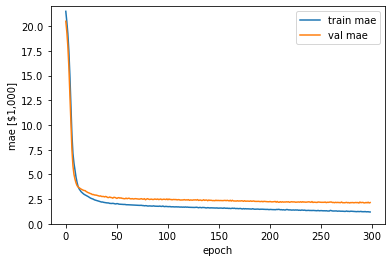

In [78]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

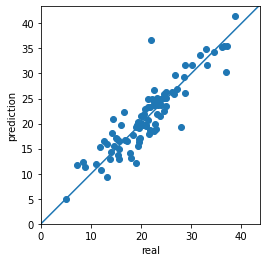

In [79]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])

## 전체 Feature를 사용하는 모델보다 더 성능이 좋은 모델을 만들 수 없을까?    

### 4. 상관관계가 높은 Feature만 사용해보자. Outlier 먼저 제거

In [80]:
#먼저 아웃라이어를 제거 하지 않은 원본 데이터의 각 Feature별 상관관계
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


아웃라이어를 제거하지 않은 데이터에서 집값(MEDV)와 절대상관계수값이 0.5이상인 Feature는 RM, PTRATIO, LSTAT 총 3개뿐이다.

In [81]:
#집값 아웃라이어 제거
boston_ex_outlier = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston_ex_outlier))

(490, 14)


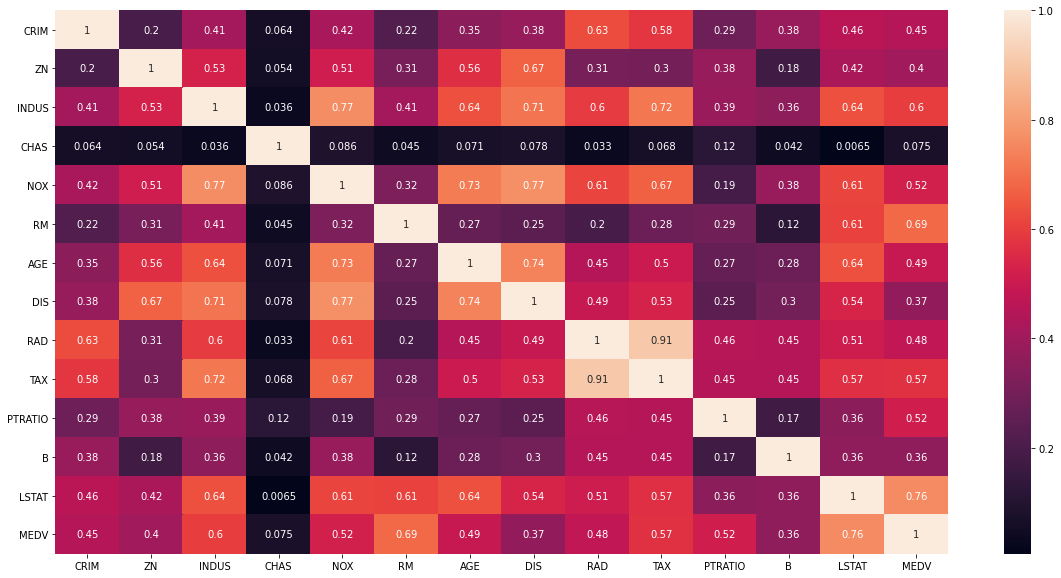

In [82]:
#아웃라이어 제거된 데이터의 각 Feature별 상관관계(절대값) 시각화
plt.figure(figsize=(20, 10))
sb.heatmap(boston_ex_outlier.corr().abs(),  annot=True)

아웃라이어를 제거하면 집값(MEDV)와 절대상관계수값이 0.5이상인 Feature는  
INDUS, NOX, RM, TAX, PTRATIO, LSTAT 총 3개가 있다.   

이 6개만 사용한 모델을 만들고 학습시켜 평가해보자.

In [83]:
x = boston_ex_outlier[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y = boston_ex_outlier['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)  

In [84]:
#데이터 표준화 
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train =  (x_train - mean) / std
x_test =  (x_test - mean) / std

In [85]:
#모델링
#데이터의 사이즈가 작고 (총 490)개 이므로 단순하므로 은닉층의 수를 줄여 과대적합을 피한다. 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [86]:
#학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 32ms/step - loss: 531.2741 - mae: 21.5543 - val_loss: 476.9225 - val_mae: 20.8275
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 503.0793 - mae: 20.9269 - val_loss: 450.9319 - val_mae: 20.2227
Epoch 3/500
13/13 [==============================] - 0s 10ms/step - loss: 472.0182 - mae: 20.2334 - val_loss: 417.8376 - val_mae: 19.4253
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 429.4754 - mae: 19.2359 - val_loss: 370.3315 - val_mae: 18.2223
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 369.7001 - mae: 17.7410 - val_loss: 307.0344 - val_mae: 16.5193
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 293.6648 - mae: 15.6792 - val_loss: 231.8449 - val_mae: 14.2566
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 209.0528 - mae: 13.1158 - val_loss: 155.4601 - val_mae: 11.5638
Epoch 8/500
13/13 [====================

Epoch 62/500
13/13 [==============================] - 0s 5ms/step - loss: 10.4690 - mae: 2.5220 - val_loss: 15.5352 - val_mae: 2.8665
Epoch 63/500
13/13 [==============================] - 0s 9ms/step - loss: 10.3212 - mae: 2.5021 - val_loss: 15.5272 - val_mae: 2.8683
Epoch 64/500
13/13 [==============================] - 0s 6ms/step - loss: 10.2640 - mae: 2.4766 - val_loss: 15.5921 - val_mae: 2.8510
Epoch 65/500
13/13 [==============================] - 0s 5ms/step - loss: 10.1450 - mae: 2.4740 - val_loss: 15.6071 - val_mae: 2.8598
Epoch 66/500
13/13 [==============================] - 0s 7ms/step - loss: 10.0784 - mae: 2.4700 - val_loss: 15.4744 - val_mae: 2.8507
Epoch 67/500
13/13 [==============================] - 0s 6ms/step - loss: 10.0642 - mae: 2.4481 - val_loss: 15.1632 - val_mae: 2.8297
Epoch 68/500
13/13 [==============================] - 0s 6ms/step - loss: 10.0178 - mae: 2.4601 - val_loss: 15.4425 - val_mae: 2.8588
Epoch 69/500
13/13 [==============================] - 0s 6ms/s

13/13 [==============================] - 0s 3ms/step - loss: 7.8706 - mae: 2.1281 - val_loss: 12.8337 - val_mae: 2.6483
Epoch 124/500
13/13 [==============================] - 0s 4ms/step - loss: 7.8515 - mae: 2.1181 - val_loss: 12.8775 - val_mae: 2.6852
Epoch 125/500
13/13 [==============================] - 0s 4ms/step - loss: 7.8356 - mae: 2.1236 - val_loss: 12.8702 - val_mae: 2.6472
Epoch 126/500
13/13 [==============================] - 0s 3ms/step - loss: 7.8082 - mae: 2.1178 - val_loss: 12.5350 - val_mae: 2.6266
Epoch 127/500
13/13 [==============================] - 0s 4ms/step - loss: 7.7503 - mae: 2.1119 - val_loss: 12.6921 - val_mae: 2.6525
Epoch 128/500
13/13 [==============================] - 0s 4ms/step - loss: 7.7864 - mae: 2.1083 - val_loss: 12.6510 - val_mae: 2.6638
Epoch 129/500
13/13 [==============================] - 0s 4ms/step - loss: 7.7788 - mae: 2.1140 - val_loss: 12.8542 - val_mae: 2.6491
Epoch 130/500
13/13 [==============================] - 0s 4ms/step - loss: 7

13/13 [==============================] - 0s 4ms/step - loss: 6.7722 - mae: 1.9591 - val_loss: 11.5292 - val_mae: 2.5330
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 6.8188 - mae: 1.9782 - val_loss: 11.7413 - val_mae: 2.5457
Epoch 186/500
13/13 [==============================] - 0s 4ms/step - loss: 6.7763 - mae: 1.9612 - val_loss: 11.4414 - val_mae: 2.5181
Epoch 187/500
13/13 [==============================] - 0s 3ms/step - loss: 6.7866 - mae: 1.9689 - val_loss: 11.5251 - val_mae: 2.5375
Epoch 188/500
13/13 [==============================] - 0s 4ms/step - loss: 6.6976 - mae: 1.9454 - val_loss: 11.4275 - val_mae: 2.5103
Epoch 189/500
13/13 [==============================] - 0s 4ms/step - loss: 6.7626 - mae: 1.9615 - val_loss: 11.5751 - val_mae: 2.5381
Epoch 190/500
13/13 [==============================] - 0s 4ms/step - loss: 6.7346 - mae: 1.9431 - val_loss: 11.4908 - val_mae: 2.5407
Epoch 191/500
13/13 [==============================] - 0s 4ms/step - loss: 6

13/13 [==============================] - 0s 4ms/step - loss: 6.1062 - mae: 1.8459 - val_loss: 10.6675 - val_mae: 2.4635
Epoch 246/500
13/13 [==============================] - 0s 4ms/step - loss: 6.1031 - mae: 1.8453 - val_loss: 10.5729 - val_mae: 2.4205
Epoch 247/500
13/13 [==============================] - 0s 4ms/step - loss: 6.0540 - mae: 1.8376 - val_loss: 10.6157 - val_mae: 2.4874
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 6.1475 - mae: 1.8597 - val_loss: 10.6960 - val_mae: 2.4585
Epoch 249/500
13/13 [==============================] - 0s 4ms/step - loss: 6.1199 - mae: 1.8428 - val_loss: 10.6267 - val_mae: 2.4448
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0488 - mae: 1.8312 - val_loss: 10.2135 - val_mae: 2.4472
Epoch 251/500
13/13 [==============================] - 0s 4ms/step - loss: 6.0528 - mae: 1.8315 - val_loss: 10.3805 - val_mae: 2.4363
Epoch 252/500
13/13 [==============================] - 0s 4ms/step - loss: 6

In [87]:
#모델 평가
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 9ms/step - loss: 10.3157 - mae: 2.4365


[10.315669059753418, 2.4364640712738037]

### 아웃라이어를 제거한 상태에서 상관관계가 높은 Feature 6개만 선택 후 학습하였더니, 
### 테스트 결과가 실제값 보다 약 $2,380 차이가 나는 모델이 생성되었다.  

### 현재까지 4번모델이 가장 성능이 좋은 모델이나, 머신러닝이 학습을 할 때마다 오차가 있기 때문에 다른모델보다 크게 차이난다고 볼 수 없다.

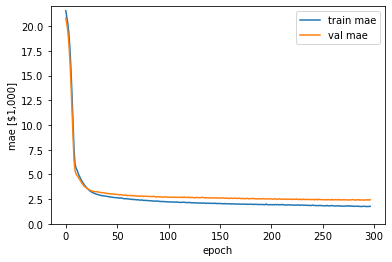

In [88]:
#학습과정 그래프
plt.plot(history.history['mae'], label='train mae') 
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch') 
plt.ylabel('mae [$1,000]') 
plt.legend(loc='best') 
plt.ylim([0, 22]) 
plt.show()

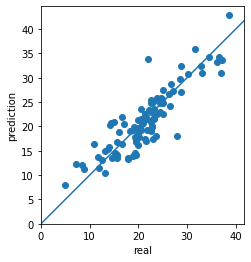

In [89]:
#평가 데이터의 실제값과 모델 예측값의 비교 그래프
test_prediction = model.predict(x_test).flatten()

plt.scatter(y_test,test_prediction)
plt.xlabel('real')
plt.ylabel('prediction')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,50],[0,50])